# Assignment 1.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2017/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday Februrary 27th, 2017 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 24 hours to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 6th, 2017 at 23:55.

## Assignment 1A: Anscombe's quartet

**Full details, see Week 2's exercises.**

**Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  **

**It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.**

In [1]:
import urllib2
from io import BytesIO
import numpy as np

#load the four datasets as np.array items of the list 'dataset'.
dataset=[]
for i in range(4):
    response = urllib2.urlopen('https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data%i.tsv'%(i+1)).read()
    dataset.append(np.genfromtxt (BytesIO(response), delimiter="\t"))

* **Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. **

In [2]:
#mean
meanX= [np.mean(dataset[i][:,0]) for i in range(4)]
meanY= [np.mean(dataset[i][:,1]) for i in range(4)]

* **Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. **

In [3]:
print ' '*11, 'meanX', '\t', ' meanY'
for i,_ in enumerate(meanX):
    print 'dataset[%i]: %0.2f \t %0.2f' %(i+1,meanX[i],meanY[i])

            meanX 	 meanY
dataset[1]: 9.00 	 7.50
dataset[2]: 9.00 	 7.50
dataset[3]: 9.00 	 7.50
dataset[4]: 9.00 	 7.50


* **Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).**

In [4]:
#variance
varX= [np.var(dataset[i][:,0]) for i in range(4)]
varY= [np.var(dataset[i][:,1]) for i in range(4)]
print '\n',' '*11,'varX', '\t', ' varY'
for i,_ in enumerate(varX):
    print 'dataset[%i]: %0.3f \t %0.3f' %(i+1,varX[i],varY[i])


            varX 	 varY
dataset[1]: 10.000 	 3.752
dataset[2]: 10.000 	 3.752
dataset[3]: 10.000 	 3.748
dataset[4]: 10.000 	 3.748


* **Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).**

In [5]:
#Pearson Correlation
corr= [np.corrcoef(dataset[i][:,0],dataset[i][:,1]) for i in range(4)]
print '\n',' '*11,'Pearson Correlation'
for i,_ in enumerate(corr):
    print 'dataset[%i]: %0.3f' %(i+1,corr[i][0,1])


            Pearson Correlation
dataset[1]: 0.816
dataset[2]: 0.816
dataset[3]: 0.816
dataset[4]: 0.817


* **The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this**
```
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
```

In [6]:
#fit straight line to data
from scipy import stats
slope = np.zeros(4)
intercept= np.zeros(4)

# a and b report
print '\n',' '*11, 'a \t\t b'
for i in range(4):
    slope[i], intercept[i], r_value, p_value, std_err = stats.linregress(dataset[i][:,0],dataset[i][:,1])
    print 'dataset[%i]: %0.3f \t %0.3f' %(i+1,slope[i],intercept[i])


            a 		 b
dataset[1]: 0.500 	 3.000
dataset[2]: 0.500 	 3.001
dataset[3]: 0.500 	 3.002
dataset[4]: 0.500 	 3.002


* **Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)**

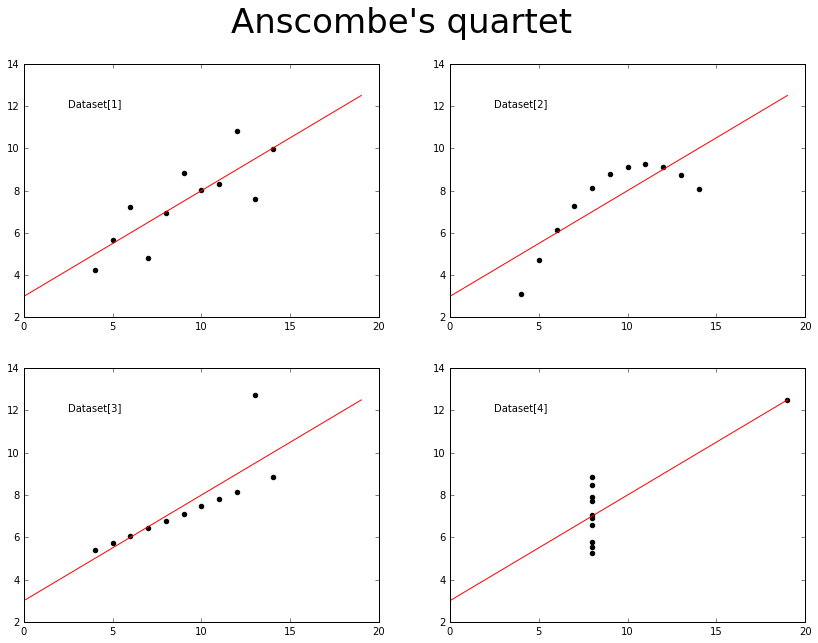

In [7]:
%matplotlib inline

#plot four datasets

import matplotlib.pyplot as plt
import numpy as np

maxvalue=max([max(dataset[i][:,0]) for i in range(4)])
minvalue=min([min(dataset[i][:,0]) for i in range(4)],0)
x = np.linspace(minvalue,maxvalue)

plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.suptitle('Anscombe\'s quartet', fontsize=34)

for i in range(4):
    plt.subplot(2, 2, i+1)
    y1=dataset[i][:,1]
    x1=dataset[i][:,0]
    plt.scatter(x1,y1,c='black')
    plt.plot(x,slope[i]*x+intercept[i], 'r')
    plt.ylim(2,14)
    plt.xlim(0,20)
    plt.text(4, 12, 'Dataset[%i]'%(i+1),
         horizontalalignment='center',
         fontsize=10)
plt.show()

* **Explain - in your own words - what you think my point with this exercise is.**

The point of the exercise is to show that summary statistics do not always tell the whole story of some data.In our example we have 4 datasets that share identical mean,variance and Pearson Correlation, despite the fact that they are dissimilar. Limitations of linear regression modelling are,also, apparent as it generates a single line that may be the same for vastly different models of data. In our case, the linear regression line is almost identical in each dataset, even though the scatterplots are totally different.

## Assignment 1B: KNN

**For full details, see Week 4's exercises.**

**The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from Week 3's exercises that the focus crimes `PROSTITUTION`, `DRUG/NARCOTIC` and `DRIVING UNDER THE INFLUENCE` tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map. **

In [8]:
#Insert necessary libraries - modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#Enable inline plotting
%matplotlib inline

#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

## *Dataset download and reading*

The necessary file was downloaded in *CSV* format. Then, the file is loaded using pandas

In [9]:
# Define file's path
filename = 'Data/SFPD_Incidents_-_from_1_January_2003.csv'

# Read file using pandas
data = pd.read_csv(filename)

## *Dataset cleaning*

During our first analysis steps, it was noticed that some records have incorrect latitude values. In order to get rid of them, we decided to exclude crime records with latitude values above 38.

In [10]:
#Remove data with wrong latitude values
data = data[data.Y < 38]

## *Focus crimes isolation*

Initially, we need to retrieve data for the three focus crimes `PROSTITUTION`, `DRUG/NARCOTIC` and `DRIVING UNDER THE INFLUENCE` that we are interested.

In [11]:
#Create necessary subsets
dfdata_Prostitution = data.loc[data['Category'] == 'PROSTITUTION'] 
print "Total number of Prostitution incidents:", len(dfdata_Prostitution)
dfdata_Drug = data.loc[data['Category'] == 'DRUG/NARCOTIC'] 
print "Total number of Drug/Narcotic incidents:", len(dfdata_Drug)
dfdata_Driving = data.loc[data['Category'] == 'DRIVING UNDER THE INFLUENCE'] 
print "Total number of Driving under the influence incidents:", len(dfdata_Driving)

Total number of Prostitution incidents: 16161
Total number of Drug/Narcotic incidents: 115135
Total number of Driving under the influence incidents: 5302


* **Begin by using `geoplotlib` to plot all incidents of the three crime types on their own map using [`geoplotlib.kde()`](https://github.com/andrea-cuttone/geoplotlib/blob/master/examples/kde.py). This will give you an idea of how the varioius crimes are distributed across the city.**

Since we were asked to plot all incidents of the three crime types on their own map, we need first to extract the geoinformation from the initial *data* dataframe for the focus crimes. 

In [12]:
#Create a function that extracts lat - lon information for each focus crime

def crime_locations(dataset):
    latitude = [float(item) for item in dataset['Y']]
    longitude = [float(item) for item in dataset['X']]
    
    #Create a dictionary for all lat-lon values
    geoinfo = {"lat": latitude,
                     "lon": longitude}
    return geoinfo

In [13]:
#Create necessary dictionaries for each focus crime

latlon_Prostitution = crime_locations(dfdata_Prostitution)
latlon_Drug = crime_locations(dfdata_Drug)
latlon_Driving = crime_locations(dfdata_Driving)

We then use `geoplotlib` to plot all incidents of the three crime types on their own map using [`geoplotlib.kde()`](https://github.com/andrea-cuttone/geoplotlib/blob/master/examples/kde.py). The specific function creates a heatmap. A boundary box is also necessary, since we want to isolate the studied area and fit the projection to it. It will be defined using the **BoundingBox**.

In [14]:
#Insert geoplotlib tools
import geoplotlib
from geoplotlib.utils import BoundingBox

#Define a function that creates the necessary heatmaps for the inserted dictionary
def kde_plot(geoinfo):
    #define plot
    geoplotlib.kde(geoinfo, bw=5, cmap='hot', cut_below=1e-4)
    #create the BoundingBox
    max_lat = np.max(geoinfo['lat'])
    min_lat = np.min(geoinfo['lat'])
    max_lon = np.max(geoinfo['lon'])
    min_lon = np.min(geoinfo['lon'])
    bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
    #set bounding box
    geoplotlib.set_bbox(bbox)
    #Enable inline plotting
    geoplotlib.inline()

## *Create plots*

In [15]:
print "Prostitution HeatMap:" 
kde_plot(latlon_Prostitution)

Prostitution HeatMap:
('smallest non-zero count', 2.8659146177536182e-09)
('max count:', 10.918804735494032)


![Heatmap](http://i.imgur.com/ZvzaaAn.png)

In [16]:
print "Drug/Narcotic HeatMap:" 
kde_plot(latlon_Drug)

Drug/Narcotic HeatMap:
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 103.72991191604355)


![HeatMap1](http://i.imgur.com/N60hxr7.png)

In [17]:
print "Driving under the Influence HeatMap: " 
kde_plot(latlon_Driving)

Driving under the Influence HeatMap: 
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 0.77586523186788514)


![HeatMap2](http://i.imgur.com/vPSkG0P.png)

* **Next, it's time to set up your model based on the actual data. You can use the code supplied in the book or try out `scikit-learn`'s [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). If you end up using the latter (recommended), you may want to check out [this example](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html) to get a sense of the usage.**
  - **You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. **But** do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset). Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map? **


In [18]:
# Calculation of the number of observations of each crime-type
print "Total number of Prostitution incidents:", len(dfdata_Prostitution)
print "Total number of Drug/Narcotic incidents:", len(dfdata_Drug) 
print "Total number of Driving under the influence incidents:", len(dfdata_Driving)

Total number of Prostitution incidents: 16161
Total number of Drug/Narcotic incidents: 115135
Total number of Driving under the influence incidents: 5302


The imbalance that is noticed in our dataset for the three different crimes (much less driving under the influence and drug/narcotic incidents compared to the prostitution incidents) will definitely affect KNN algorithm. The output of KNN depends on the majority vote of its neighbors, therefore the smaller crime datasets will disappear, if the total amount of drug incidents will be included in the analysis.

  - **You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following.**

In supervised learning, the imbalanced number of instances among the classes in a dataset can make the algorithms to classify one instance from the minority class as one from the majority class [1]. Therefore, a more 'balanced' dataset should give us better accuracy for the three focus crimes.

If we want to build a predictive model, particularly one that performs well within a Machine Learning framework (i.e. Decision Tree, SVM, Naive Bayes, etc), then a balanced dataset should be our first choice according to some literature references. Much of the literature on class imbalance finds that random undersampling (down sampling the majority class to the size of the minority class) can improve our system's performance. In more advanced frameworks, such as the modification of a bagging framework that samples to class equivalence

Data in proportion to occurences would also be our priority if we want to create a representative description model. The density of the dataset is important, since it represents the reality of the problem. Therefore, we need our model to get the correct distribution of dataset's categories.

Training time and predictions' accuracy are only some parameters that we should take into consideration before our decision. It will be a waste of computing resources if we use the whole dataset in a simple prediction model formulation (the selection of equal number of examples and the proper use of weights most probably will give us the same results in less time).

[1] *Beckmann, Marcelo, Nelson FF Ebecken, and Beatriz SL Pires de Lima. "A KNN undersampling approach for data balancing." Journal of Intelligent Learning Systems and Applications 7.4 (2015): 104.*

## *Unbalanced map*

We decided to work with the unbalanced map, since it would be more interesting to investigate real spatial and temporal crime probabilities. The original heat maps give us the crime distribution that is formerly observed, and the conclusions that will be made using the KNN algorithm will represent reality, since they will be based on true crimes' density.

In [19]:
#Isolate focus crimes
dfdata_focus_crimes = data.loc[data['Category'].isin(['PROSTITUTION','DRUG/NARCOTIC','DRIVING UNDER THE INFLUENCE'])]

print "The total number of crimes that will be analyzed is", len(dfdata_focus_crimes), "from which:"
print len(dfdata_Prostitution)/(float(len(dfdata_focus_crimes))/100),"% is the percentage of Prostitution crimes"
print len(dfdata_Driving)/(float(len(dfdata_focus_crimes))/100), "% the percentage of Driving under the influence crimes, and"
print len(dfdata_Drug)/(float(len(dfdata_focus_crimes))/100), "% the percenteage of drug/narcotic crimes." 

The total number of crimes that will be analyzed is 136598 from which:
11.8310663406 % is the percentage of Prostitution crimes
3.8814623933 % the percentage of Driving under the influence crimes, and
84.2874712661 % the percenteage of drug/narcotic crimes.


* **Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using `geoplotlib.dot()`. To plot in three distinct the colors, I simply ran the command three times, once for each color.**


## *Grid definition and plot*

Following the above recommendation, we will create a 70x70 grid. For its definition, the maximum and minimum latitudes and longitudes will be used, as well as the `arange()` function from `numpy` package for the creation of evenly spaced values within this given interval.

In [20]:
# Definition of grid's size
N = 75

#Get geoinformation of crime data using a previous defined function
crimes_geodata = crime_locations(dfdata_focus_crimes)

#Calculate min, max of longitudes - latitudes for grid formulation
max_lat = np.max(crimes_geodata['lat'])
min_lat = np.min(crimes_geodata['lat'])
max_lon = np.max(crimes_geodata['lon'])
min_lon = np.min(crimes_geodata['lon'])

# Create sequence from min_lat to max_lat with N points
lat_seq = np.arange(min_lat, max_lat, float(max_lat-min_lat)/N)
# Create sequence from min_lon to max_lon with N points
lon_seq = np.arange(min_lon, max_lon, float(max_lon-min_lon)/N)

# Create a list that includes all grid points
grid_points = []

for lat in lat_seq:
    for lon in lon_seq:
        grid_points.append((lat,lon))
        
# Define the variables for geoplotlib.dot
grid_latitude = [item[0] for item in grid_points]
grid_longitude = [item[1] for item in grid_points]

# Make a dictionary for the geoplotlib.dot
grid_data = {"lat": grid_latitude,
                          "lon": grid_longitude}

# Plot the grid
geoplotlib.dot(grid_data)
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)
geoplotlib.inline()

![Grid1](http://i.imgur.com/jB3iawb.png)

* **Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, `K`.**  

Before KNN's run, the dataset should be formulated appropriately. The algorithm takes into consideration the dataset attributes **X** (in our case the longitude and latitude values) and the target variable **y** (which represents the crime category) as training data when fitting the model.

* X Definition

In [21]:
# Longitude "X" and Latitude "Y" values isolation
dflatitudes = dfdata_focus_crimes['Y'].tolist()
dflongitudes = dfdata_focus_crimes['X'].tolist()

# Create a list with all longitude and latitudes of our train set
X_train = [[dflatitudes[item], dflongitudes[item]] for item in range(len(dflongitudes))]

* y Definition: We decided to work with nominal data. 1 - Drug/Narcotic crime, 2 - Prostitution crime and 3 - Driving under the influence

In [22]:
# Create another list for the target variable
y_train = list()
for crime in dfdata_focus_crimes['Category']:
    if crime == "DRUG/NARCOTIC":
        y_train.append(1)
    elif crime == "PROSTITUTION":
        y_train.append(2)
    elif crime == "DRIVING UNDER THE INFLUENCE":
        y_train.append(3)

## *KNN Training face and prediction implementation*

In [23]:
#Reformulate grid_data file (from dictionary to list)
X_pred = [list(item) for item in grid_points]

In [24]:
from sklearn import neighbors, datasets

# Formulation of a function that trains the KNN algorithm and predicts
def KNN(X_train, y_train, X_pred, Neighbors):
    # new instance of 
    knn=neighbors.KNeighborsClassifier(n_neighbors=Neighbors)
    # Neighbours Classifier data fitting
    knn.fit(X_train, y_train)
    # Labels of the coordinates in the grid prediction
    return knn.predict(X_pred)

Since we want to create three different plots for No.Neighbors = 5, 10, 30, it will be quicker if we create another function for the geoplotlib plots.

## *Geoplotlib Plot definition*

In [25]:
def KNN_plot(y_pred,X_pred,N):
    
    Drug_crimes = {}
    Drug_crimes['lat'] = []
    Drug_crimes['lon'] = []
    Prostitution_crimes = {}
    Prostitution_crimes['lat'] = []
    Prostitution_crimes['lon'] = []
    Driving_crimes = {}
    Driving_crimes['lat'] = []
    Driving_crimes['lon'] = []

    # Store in each dictionary the coordinates of the respectively crimes
    
    # For each grid point:
    for i in range(75*75):
        if (y_pred[i] == 1):
            Drug_crimes['lat'].append(X_pred[i][0])
            Drug_crimes['lon'].append(X_pred[i][1])
            #print "Drug crime found"
        if (y_pred[i] == 2):
            Prostitution_crimes['lat'].append(X_pred[i][0])
            Prostitution_crimes['lon'].append(X_pred[i][1])
            #print "Prostitution Crime found"
        if (y_pred[i] == 3):
            Driving_crimes['lat'].append(X_pred[i][0])
            Driving_crimes['lon'].append(X_pred[i][1])
            #print "Driving under influence crime found
    
    geoplotlib.dot(Drug_crimes, color='green')
    geoplotlib.dot(Prostitution_crimes, color='red')
    geoplotlib.dot(Driving_crimes, color='blue')
    bbox = BoundingBox(north = max_lat, south = min_lat, west = min_lon, east = max_lon)
    geoplotlib.set_bbox(bbox)
    geoplotlib.inline()

## *Model Visualization*

In [26]:
print "K=5 NEAREST NEIGHBORS:"
y_pred = KNN(X_train, y_train, X_pred, 5)
KNN_plot(y_pred, X_pred, 5)

print "K=10 NEAREST NEIGHBORS:"
y_pred = KNN(X_train, y_train, X_pred, 10)
KNN_plot(y_pred, X_pred, 10)

print "K=30 NEAREST NEIGHBORS:"
y_pred = KNN(X_train, y_train, X_pred, 30)
KNN_plot(y_pred, X_pred, 30)

K=5 NEAREST NEIGHBORS:


K=10 NEAREST NEIGHBORS:


K=30 NEAREST NEIGHBORS:


![Grid2](http://i.imgur.com/gpxTrpJ.png)
![Grid3](http://i.imgur.com/8kaz5fy.png)
![Grid4](http://i.imgur.com/ZU42NUs.png)

* **Describe what happens to the map as you increase the number of neighbors, K.**

For a small number of neighbors, we can easily see that there is a diversity in the distribution of the `focus_crimes`. The `DRIVING UNDER THE INFLUENCE` crimes are observed in multiple central and western parts of SF. However, that phenomenon is considerably decreased when the number of neighbors increases. To a similar extent, the `PROSTITUTION` crimes are also affected. Consequently, the larger the **K** is, the smoother the classification boundaries would be, thus the particularity of our conclusions. 

# Assignment 1C: Linear Regression

**Full details, see Week 4's excercises.**

**Start by picking an area and a crime type, I recommend starting with *all of SF* and `LARCENY/THEFT` so you don't have too many zero counts. Similarly, I recommend using 2015 data for training (big feel free grab everything if you feel a need for big data in your life).**

**We will only make predictions for the interval 5am-5pm where the crime count for `LARCENY/THEFT` is more or less linearly increasing.**

**We start by creating a scatterplot. **
- **Put time-of-day (in the range 05:00-17:00) on the $x$-axis. **

In [27]:
#Insert necessary libraries for this task
import collections
import scipy
from sklearn import datasets, linear_model

#Transform the data previously read into array format
data=np.array(data)

#Time of the day in range 05:00-17:00
x=range(5,18)

- **Next you go over the training data and bin and observed number of `LARCENY/THEFT` crimes per hour. You should have 12 data-points per day of training data.**

In [28]:
#Initialize necessary lists
y_hour=[] 
hour=[]
year=[]

#Take from data only Larcent/Thefts in 2015 between 05:00-17:00
for i in range(len(data)):
    year.append(int(data[i,4].split("/")[-1][:4]))
    
    if year[i]==2015:
        hours,minutes=data[i,5].split(":")[-2:]
        hour=int(hours)
        if data[i,1]=='LARCENY/THEFT':
                if hour>4 and hour<18:
                    y_hour.append(hour)

#Count crimes per hour
y_counter=collections.Counter(y_hour) 
y=y_counter.values()

- **Plot the (time-of-day, bin-count) tuples. Does it look like there is a correlation? **

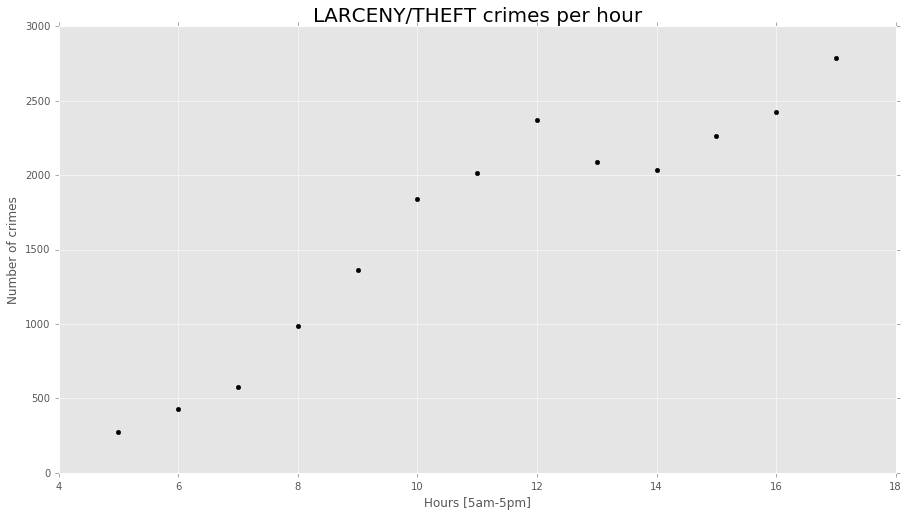

In [29]:
# Scatter plot crimes per hour
plt.scatter(x, y,  color='black')
plt.title('LARCENY/THEFT crimes per hour', fontsize=20)
plt.ylabel('Number of crimes')
plt.xlabel('Hours [5am-5pm]')
plt.show()

In the scatterplot above, it looks like there is a **positive correlation** between the two variables.

- **Report the Pearson-correlation. **

In [30]:
#Calculate Pearson-correlation and print the result
corr=scipy.stats.pearsonr(x, y)
print 'The Pearson-correlation between the observed number of LARCENY/THEFT crimes and hour is:\n',corr[0]
print 'which is a number very close to 1 so it indicates strong positive correlation.'

The Pearson-correlation between the observed number of LARCENY/THEFT crimes and hour is:
0.946944443698
which is a number very close to 1 so it indicates strong positive correlation.


**In the book, the, simple linear model model is described as**

**$$y_i = \beta x_i + \alpha + \epsilon_i$$ **

**In our example, each observation (the $(x_i, y_i)$ pair) is found by going over the dataset, day by day, and for each hour registering *time-of-day* ($x_i$) and *number of `LARCENY/THEFT` crimes in that hour* ($y_i$). As mentioned above, this means that you should extract $12\times 365 = 4\,380$ datapoints from the 2015 data when you prepare the data to fit the model.**

**So your task is to finally **
* **Fit this model to the data (and report $\alpha, \beta$).**

In [31]:
# Fit linear regression model to the data
x=np.asarray(x).reshape((-1, 1))
y=np.asarray(y).reshape((-1, 1))

regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(x,y)

#Print alpha, beta
b=regr.coef_
a=regr.intercept_

print 'The coefficients are:\n','alpha:',' '.join(map(str, a)),'\n','beta:',' '.join(map(str, b))

The coefficients are:
alpha: -582.005494505 
beta: [ 202.97252747]


* **Add the straight line to your scatterplot (similar to fig 14-1 in the book). **

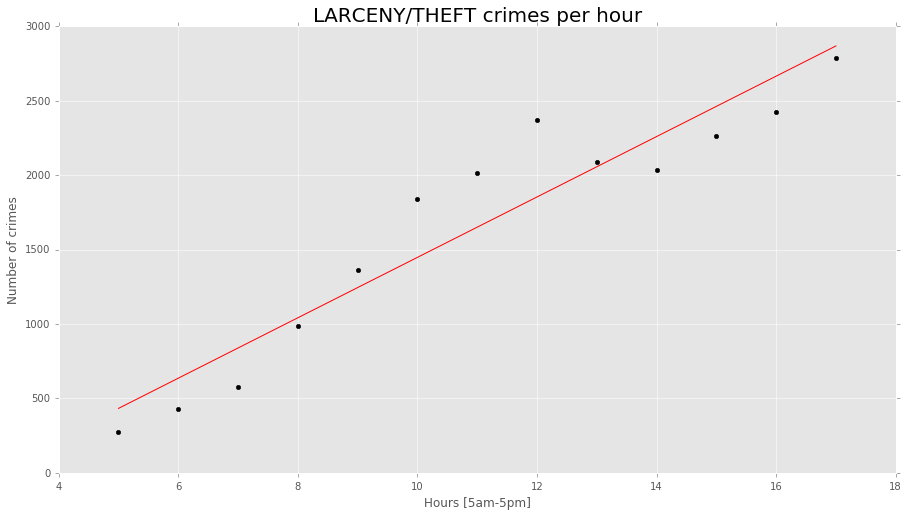

In [32]:
#Scatter plot again the data and add a straight line
plt.plot(x,regr.predict(x),color='red')
plt.scatter(x, y,  color='black')
plt.title('LARCENY/THEFT crimes per hour', fontsize=20)
plt.ylabel('Number of crimes')
plt.xlabel('Hours [5am-5pm]')
plt.show()

# Assignment 1D: Multiple Regression

**Let's improve the model by incorporating the total amount of crime in the area we're considering. **

**In the book, the more general model with $k$ input variables is described as**

**$$y_i = \alpha + \beta_1x_{i1} + \ldots + \beta_k x_{ik} + \epsilon_i.$$**

**We will be looking at the case when $k=2$, so our model is simply **

**$$y_i = \alpha + \beta_1x_{i1} + \beta_2 x_{i2} + \epsilon_i.$$ **

**In our example, we want to include *both* the time of day (as above) and the total amount of crime in our model. This means that the $(x_{i1}, x_{i2}, y_{i})$ variables in the model has the following correspondence:**
* **$x_{i1}$ corresponds to time-of-day (input variable)**
* **$x_{i2}$ corresponds to total amount of crime in the area (input variable)**
* **$y_i$ corresponds to the number of `LARCENY/THEFT` crimes in that bin (output variable)**

**As above, one observation is a $(x_{i1}, x_{i2}, y_{i})$ and you should have 12 for each day in the dataset**.

**In order to make the model useful, you have transform your input variables a bit before fitting (as [described in detail in the Week 4 exercises](http://nbviewer.jupyter.org/github/suneman/socialdataanalysis2017/blob/master/lectures/Week4.ipynb)). Specifically,**

* **Firstly, instead of using total crime vs. the crime we're considering, remember to use differences between _average_ total crime and observed crime. **Pro tip**: going back to the Week 4 exercises to read the details will help you a lot here.**
* **Secondly, remember to rescale your input variables. **Pro tip**: going back to the Week 4 exercises to read the details will also help you a lot for this one.**

**Explain in your own words the reasoning between the two bullets above.**

There are a couple of assumptions that are required in a multiple regression model:

* The first is that the columns of **x** should be linearly **independent**. If this assumption fails, it’s impossible to estimate *beta* (see chapter 15, "Further Assumptions of the Least Squares Model"). We expect that the total amount of crime (all crime-categories added up) variable is strongly correlated with time-of-day variable. For that reason, we should use the differences between *average* total crime and observed crime for the dependence removal. Using the new input variable we will be able to estimate the *beta* values.
* For a better performace of multiple regression, it is important that the input variables have approximately the same size. Therefore, the rescaling of our input files is necessary.

The above bullet points justify the reccommendations of the assignment task given above the answer. 

**Finally, create and fit the data set using multiple regression. **

In [33]:
#Insert necessary libraries - modules
from itertools import chain
from __future__ import division
import csv
from sklearn import linear_model
from collections import defaultdict

####### import data
def get_mulList(*args):
    return map(list,zip(*args))

#load data to a dictionary with keys the features(attributes) of the dataset, and values the observations.
with open(filename, 'rb') as f:
    datalist = list(csv.reader(f))
    data = dict(zip(datalist[0],get_mulList(*datalist[1:])))


#1. Difference wrt average.
        
#nested dictionary.1st-level-keys:'Hour-bins', 2nd-level-keys:'date', values:observed #crimes.
cObs=defaultdict(lambda : defaultdict(int)) 
for i, time in enumerate(data['Time']):
    hour=int(time.split(':')[0])
    date=data['Date'][i][:10]
    year = int(date.split("/")[-1])
    if data['Category'][i]== 'LARCENY/THEFT' and hour in range(5,17):
        cObs[hour][date]+=1

#unique dates in our dataset.
dates=set([date[:10] for date in data['Date']]) 
numberOfDays=len(dates)

#dictionary. keys:'Hour-bins', values: average # crimes.
cAve={hour:sum(cObs[hour].values())/numberOfDays for hour in range(5,17)} 

#nested dictionary. 1st-level-keys:'Hour-bins', 2nd-level-keys:'date', values:effective #crimes.
cEff=defaultdict(lambda : defaultdict(float))
                 
for i, time in enumerate(data['Time']):     
    hour=int(time.split(':')[0])
    date=data['Date'][i][:10]
    year = int(date.split("/")[-1])
    if hour in range(5,17):
        cEff[hour][date]=cObs[hour][date]-cAve[hour]

#2. Rescaling

#dictionary. keys: 'Hour-bins', values: #crimes in each timebin.
timeBins= {hour: sum(cObs[hour].values()) for hour in range(5,17)}

#rescale data so that they have zero mean and unit variance.
meanTimeBins=np.mean(timeBins.values())
stdTimeBins=np.std(timeBins.values())
sTimeBins={hour: (timeBins[hour]-meanTimeBins)/stdTimeBins   for hour in range(5,17)}

scEff=defaultdict(lambda : defaultdict(float))
lengthcEff=len(cEff.keys())*numberOfDays
meancEff=sum([sum(cEff[key1].values()) for key1 in cEff.keys()])/lengthcEff
stdcEff=np.sqrt((1/lengthcEff)*sum([sum([(cEff[key1][key2]-meancEff)**2 for key2 in dates]) for key1 in cEff.keys()]))
for key in cEff.keys():
    scEff[key]={date: (cEff[key][date]-meancEff)/stdcEff for date in dates}

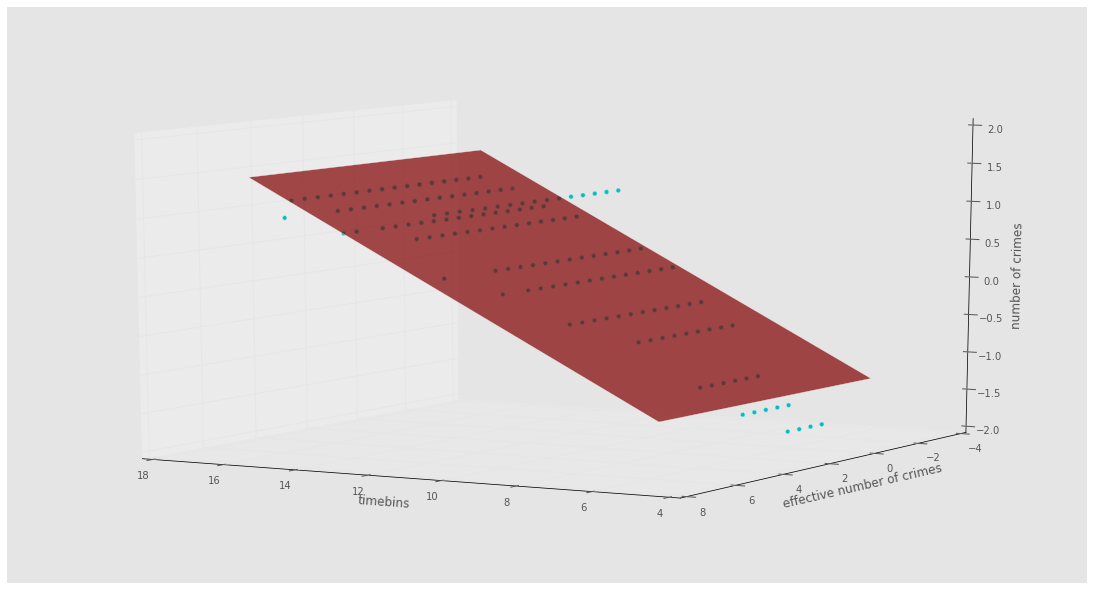

In [34]:
###plot###

#Insert necessary libraries - modules
from __future__ import division
from collections import defaultdict
from sklearn import preprocessing,linear_model
from mpl_toolkits.mplot3d import Axes3D
from itertools import chain

x1Train,x2Train,yTrain= [],[],[]
for ii,iterdate in enumerate(data['Date']):
    hour=int(data['Time'][ii][:2])
    date=iterdate[:10]
    year = int( date.split("/")[-1] )
    if year==2015 and hour in range(5,17) and data['Category'][ii]== 'LARCENY/THEFT':
        x1Train.append(hour)
        x2Train.append(scEff[hour][date])
        yTrain.append(sTimeBins[hour])

#fit straight line to data
XTrain=np.stack((x1Train,x2Train),axis=1)
YTrain=np.array(yTrain).reshape((-1,1))

mulreg = linear_model.LinearRegression(fit_intercept=True)
mulreg.fit(XTrain,YTrain)
yPred=mulreg.predict(XTrain)

#prepare data for plot
a , b = np.meshgrid([min(x1Train),max(x1Train)],[min(x2Train),max(x2Train)])

ab = np.stack(([min(x1Train),max(x1Train)],[min(x2Train),max(x2Train)]),axis=1)
c = mulreg.predict(ab)
c = c.T

#create plot
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x1Train,x2Train,yTrain, c='c', marker='o')
ax.set_xlabel('timebins')
ax.set_ylabel('effective number of crimes')
ax.set_zlabel('number of crimes')
ax.plot_surface(a,b,c,color='r',alpha=0.7)

ax.view_init(10,120)

plt.show()

**Report $\alpha, \beta_1, \beta_2$.**

In [35]:
print 'a = %f\nb1 = %f\nb2 = %f'%(mulreg.intercept_,mulreg.coef_[0][0],mulreg.coef_[0][1])

a = -2.377667
b1 = 0.234394
b2 = 0.023013


# Assignment 1E: Simple evaluation of regression models


**In this assignment, compare the accuary of the simple linear regression with the multiple regression to see what we have gained by increasing the model complexity. **

**We test on two separate weeks of data from 2016. We use the first 7 days (Week A) of January 2016 and first 7 days of June 2016 (Week B). **

**We measure error for a time-bin simply as the absolute difference between predicted crime and observed crime. The error for a week is simply the average error over all time-bins during that week.**

* **Report the performance of Simple & Multiple Regression for Weeks A & B (four results total).**

In [36]:
x1testA, x2testA, ytestA, x1testB, x2testB, ytestB=[],[],[],[],[],[]

#Isolate test sets
for ii, iterdate in enumerate(data['Date']):
    hour=int(data['Time'][ii][:2])
    date=iterdate[:10]
    month= int(date[0:2])
    day= int(date[3:5])
    year = int( date.split("/")[-1] )
    if year==2016 and hour in range(5,17):
        if month==1 and day<=7:
            #Test Set of Simple Regression - Week A
            x1testA.append(hour)
            #Test Set of Multiple Regression - Week A
            x2testA.append(scEff[hour][date])
            ytestA.append(sTimeBins[hour])
        elif month==6 and day<=7:
            #Test Set of Simple Regression - Week B
            x1testB.append(hour)
            #Test Set of Multiple Regression - Week B
            x2testB.append(scEff[hour][date])
            ytestB.append(sTimeBins[hour])

#prepare data's shape.

# Multiple Regression - [x1,x2]
XtestA=np.stack((x1testA,x2testA),axis=1)
XtestB=np.stack((x1testB,x2testB),axis=1)

# Simple Regression - [x1]
x1testA=np.array(x1testA).reshape((-1, 1))
x1testB=np.array(x1testB).reshape((-1, 1))

ytestA=np.array(ytestA)
ytestB=np.array(ytestB)

#compute errors - absolute difference between predicted crime and observed crime.

# Simple Regression - Week A
errorA=np.sum(abs(ytestA-regr.predict(x1testA)))/len(ytestA)
# Multiple Regression - Week A
errormulA=np.sum(abs(ytestA-mulreg.predict(XtestA).T))/len(ytestA)
# Simple Regression - Week B
errorB=np.sum(abs(ytestB-regr.predict(x1testB).T))/len(ytestB)
# Multiple Regression - Week B
errormulB=np.sum(abs(ytestB-mulreg.predict(XtestB).T))/len(ytestB)

print '\t\tPerformance Results:\n\t\t\tWeek A: \tWeekB: \nSimple Regression:\t%f\t%f \nMultiple Regression:\t%f \t%f'%(errorA,errorB,errormulA,errormulB)

		Performance Results:
			Week A: 	WeekB: 
Simple Regression:	2416956.237780	1800.020545 
Multiple Regression:	0.217966 	0.215695


* **Comment on your results.**

As can be clearly seen, **Multiple Regression** performs much better that our simple regression model on both test sets. Ths has to do both with the fact that we fit a more complex model(3 parameters instead of 2) and with the rescaling we performed prior to our analysis. The huge value of error in simple regression is explained also due to overfitting to the training data.